# RFM
## Recency - How recent the customer bought the goods
## Frequency - How often customer buys
## Monetary - How much money he spends usually i.e. his monetary value.

RFM (Recency, Frequency, Monetary) analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy.

RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

Various Combinations of the RFM scores can help us in customer segmentation and clustering them into different categories and thereby help the organiztion in optimally spending their resources to increase the sales

For more details see this link : https://www.putler.com/rfm-analysis/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [1]:
from google.colab import files 
files.upload()

Saving RFM_data.xlsx to RFM_data.xlsx


In [4]:
data = pd.read_excel("RFM_data.xlsx")


In [ ]:
# Mound google drive 
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Convert the series invoice date data in datetime format and count the unique number of attributes

In [6]:
#Convert the date in YYYY-mm-dd HH:MM format and store that date in 'Date' column
data['Date']=pd.to_datetime(data['InvoiceDate'], format = '%Y-%m-%d %H:%M:%S')
#data['Date']=data['Date'].apply(lambda x: x.strftime('%Y-%d-%m %H:%M'))

# Count the unique no of attributes in Retail data
def unique_counts(data):
   for i in data.columns:
       count = data[i].nunique()
       print(i, ": ", count)
unique_counts(data)


InvoiceNo :  25900
StockCode :  4070
Description :  4223
Quantity :  722
InvoiceDate :  23260
UnitPrice :  1630
CustomerID :  4372
Country :  38
Date :  23260


#### Calculate Total Price by multiplying units and quantity and store that value in separate column Total_Price

In [7]:

data['Total_Price']=data['Quantity']*data['UnitPrice']
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01 08:26:00,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01 08:34:00,54.08


#### Only consider rows without NaN values and store the data in dataset data_rfm

In [8]:
a=data['Quantity']


In [9]:

data_rfm = data[np.isfinite(data['CustomerID'])]


#### Count the unique no of attributes in Retail data

In [10]:

unique_counts(data_rfm)

InvoiceNo :  22190
StockCode :  3684
Description :  3896
Quantity :  436
InvoiceDate :  20460
UnitPrice :  620
CustomerID :  4372
Country :  37
Date :  20460
Total_Price :  4041


In [11]:
#For the sake of calculating recency and frequency, drop the rows with negative values of Quantity and store the data in final_df
final_rfm = data_rfm[data_rfm['Quantity'] > 0]

In [12]:
final_rfm.shape

(397924, 10)

In [13]:
any(final_rfm['Total_Price']<0)

False

In [14]:
unique_counts(final_rfm)

InvoiceNo :  18536
StockCode :  3665
Description :  3877
Quantity :  302
InvoiceDate :  17286
UnitPrice :  441
CustomerID :  4339
Country :  37
Date :  17286
Total_Price :  2940


In [15]:
type(final_rfm['Date'].max())

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
final_rfm['Date'].min()

Timestamp('2010-12-01 08:26:00')

In [17]:
#Calculate recency and frequency
import datetime as dt
NOW = dt.datetime(2011,12,10)


In [18]:
rfmTable = final_rfm.groupby('CustomerID').agg({'Date': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x),'Total_Price': lambda x: x.sum()})
rfmTable['Date'] = rfmTable['Date'].astype(int)
rfmTable.rename(columns={'Date': 'recency', 
                         'InvoiceNo': 'frequency',
                       'Total_Price': 'monetary_value'}, inplace=True)

In [19]:
#rfmTable = pd.merge(mTable, rfTable, on="CustomerID",how = 'inner')
rfmTable.shape


(4339, 3)

In [20]:
rfmTable.head(10)

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
12352.0,36,85,2506.04
12353.0,204,4,89.00
12354.0,232,58,1079.40
12355.0,214,13,459.40


#### Seggregate the brands into 3 segments

### Normalising the features

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( rfmTable )

In [22]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
import random
random.seed(1)
X_sample = np.array(random.sample(X_scaled.tolist(),20))


In [24]:
rfmTable["cluster_new"] = clusters.labels_

In [25]:
rfmTable
type(X_scaled)

numpy.ndarray

In [26]:
rfmTable.groupby('cluster_new' ).mean()

,recency,frequency,monetary_value
cluster_new,,,
0,40.898644,103.079174,2028.480799
1,4.000000,2566.000000,126118.310000
2,246.813889,27.750926,636.501112


In [27]:
#Dendogram built with random samples from X_scaled

In [28]:
rfmTable.drop( 'cluster_new', axis = 1, inplace = True )

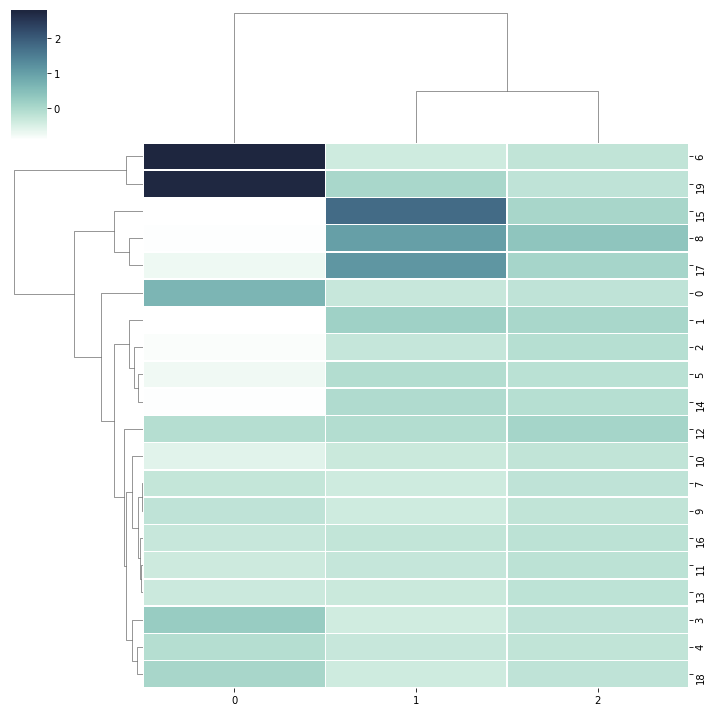

In [29]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sn.clustermap(X_sample, cmap=cmap, linewidths=.5)


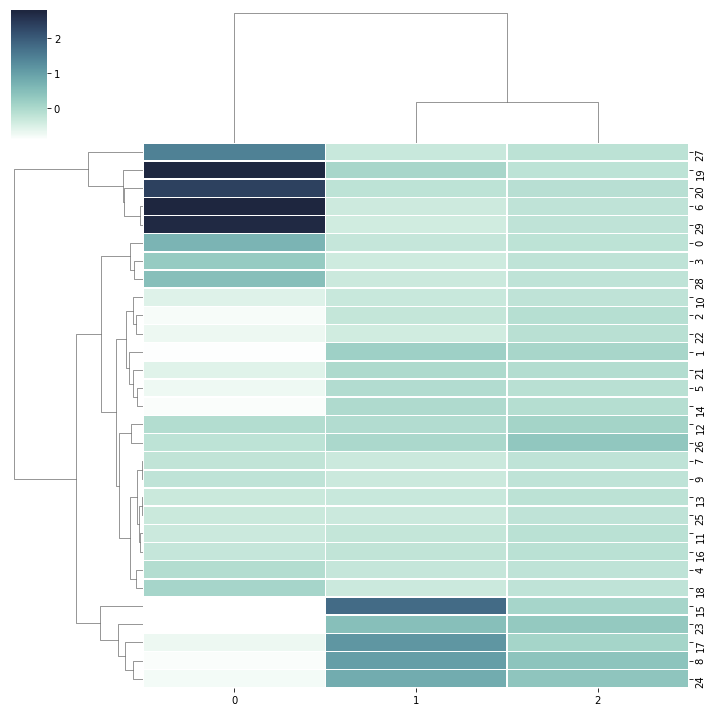

In [30]:
#Lets take one more sample to validate dendogram
random.seed(1)
X_sample = np.array(random.sample(X_scaled.tolist(),30))
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sn.clustermap(X_sample, cmap=cmap, linewidths=.5)

### Consider Elbow method to verify the cluster segmentation

In [31]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [32]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [33]:

clusters_df.head(10)

,num_clusters,cluster_errors
0,1,13017.000000
1,2,8996.762762
2,3,5453.122485
3,4,4000.648983
4,5,2958.445965
5,6,2371.441752
6,7,1923.447065
7,8,1675.003344
8,9,1553.761663


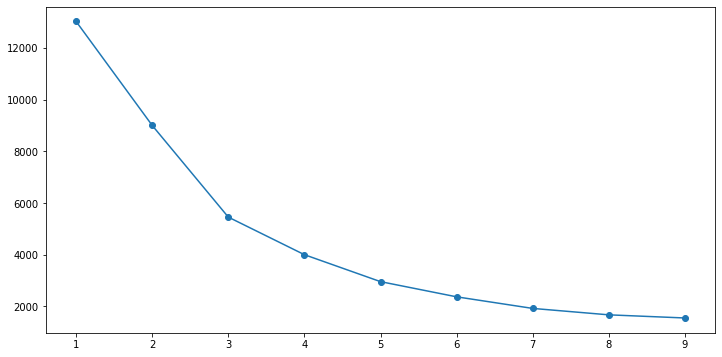

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [35]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )
rfmTable["cluster_label"] = clusters.labels_

In [36]:
rfmTable.groupby('cluster_label').mean()

,recency,frequency,monetary_value
cluster_label,,,
0,246.813889,27.750926,636.501112
1,40.898644,103.079174,2028.480799
2,4.000000,2566.000000,126118.310000


In [37]:
rfmTable_0 = rfmTable[rfmTable.cluster_label == 0]

In [38]:
rfmTable_0.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
12346.0,325,1,77183.60,0
12350.0,310,17,334.40,0
12353.0,204,4,89.00,0
12354.0,232,58,1079.40,0
12355.0,214,13,459.40,0
12361.0,287,10,189.90,0
12365.0,291,22,641.38,0
12373.0,311,14,364.60,0
12377.0,315,77,1628.12,0


In [39]:
rfmTable_0.shape

(1080, 4)

In [40]:
rfmTable_1 = rfmTable[rfmTable.cluster_label == 1]
rfmTable_1.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
12347.0,2,182,4310.00,1
12348.0,75,31,1797.24,1
12349.0,18,73,1757.55,1
12352.0,36,85,2506.04,1
12356.0,22,59,2811.43,1
12357.0,33,131,6207.67,1
12358.0,1,19,1168.06,1
12359.0,57,248,6372.58,1
12360.0,52,129,2662.06,1


In [41]:
rfmTable_1.shape

(3246, 4)

In [42]:
rfmTable_2 = rfmTable[rfmTable.cluster_label == 2]
rfmTable_2.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
12415.0,24,716,124914.53,2
12748.0,0,4596,33719.73,2
13089.0,2,1818,58825.83,2
14096.0,4,5111,65164.79,2
14156.0,9,1400,117379.63,2
14646.0,1,2080,280206.02,2
14911.0,1,5677,143825.06,2
15311.0,0,2379,60767.90,2
16446.0,0,3,168472.50,2


## As seen the clusters are not balanced

In [43]:
rfmTable_2.shape

(13, 4)

#### Each customer is assigned with the cluster label.
#### All the customers with low recency and high frequency and and monetary value are segmented in this Cluster .These are the most profitable and highly valued customers company should look at.


In [44]:
rfmTable_0.mean()

recency           246.813889
frequency          27.750926
monetary_value    636.501112
cluster_label       0.000000
dtype: float64

In [45]:
rfmTable_1.mean()

recency             40.898644
frequency          103.079174
monetary_value    2028.480799
cluster_label        1.000000
dtype: float64

In [46]:
rfmTable_2.mean()

recency                4.00
frequency           2566.00
monetary_value    126118.31
cluster_label          2.00
dtype: float64

In [47]:
clusters = KMeans(3)  
clusters.fit( X_scaled )


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
rfmTable.head(10)

,recency,frequency,monetary_value,cluster_label
CustomerID,,,,
12346.0,325,1,77183.60,0
12347.0,2,182,4310.00,1
12348.0,75,31,1797.24,1
12349.0,18,73,1757.55,1
12350.0,310,17,334.40,0
12352.0,36,85,2506.04,1
12353.0,204,4,89.00,0
12354.0,232,58,1079.40,0
12355.0,214,13,459.40,0


In [49]:
rfmTable.groupby('cluster_label').mean()

,recency,frequency,monetary_value
cluster_label,,,
0,246.813889,27.750926,636.501112
1,40.898644,103.079174,2028.480799
2,4.000000,2566.000000,126118.310000


## Since K means is not that great at grouping we are going to use one of the latest methods i.e. Jenkins Natural breaks

See this paper for details: https://www.researchgate.net/publication/225168356_Comparison_of_classification_and_clustering_methods_in_spatial_rainfall_pattern_recognition_at_Northern_Iran

In [50]:
r_quarters = rfmTable['recency'].quantile(q=[0, 0.25,0.5,0.75, 1]).to_list()
f_quarters = rfmTable['frequency'].quantile(q=[0, 0.25,0.5,0.75, 1]).to_list()
m_quarters = rfmTable['monetary_value'].quantile(q=[0, 0.25,0.5,0.75, 1]).to_list()
quartile_spread = pd.DataFrame(list(zip(r_quarters, f_quarters, m_quarters)), 
                      columns=['Q_Recency','Q_Frequency', 'Q_Monetary'],
                     index = [ 'min','first_part','second_part','third_part', 'max'])
quartile_spread

,Q_Recency,Q_Frequency,Q_Monetary
min,0.0,1.0,0.000
first_part,17.0,17.0,307.245
second_part,50.0,41.0,674.450
third_part,141.5,100.0,1661.640
max,373.0,7847.0,280206.020


In [51]:
!pip install jenkspy

     |████████████████████████████████| 51kB 3.1MB/s 
  Created wheel for jenkspy: filename=jenkspy-0.1.5-cp36-cp36m-linux_x86_64.whl size=69032 sha256=95201e5434b45acbc3d51bafd4148e21d6154439f4bb5c7cccc1001389ca7750
  Stored in directory: /root/.cache/pip/wheels/14/1d/b0/45b9ac586dd190ca029df1965fe9f497327506376d51422475
Successfully built jenkspy


In [52]:
import jenkspy

In [53]:
rfmTable['r_percentile'] = rfmTable['recency'].rank(pct=True,ascending=False)
rfmTable['r_score'] = pd.qcut(rfmTable['r_percentile'], 4, labels=range(4,0,-1))
rfmTable['f_percentile'] = rfmTable['frequency'].rank(pct=True,ascending=True)
rfmTable['f_score'] = pd.qcut(rfmTable['f_percentile'], 4, labels=range(4,0,-1))
rfmTable['m_percentile'] = rfmTable['monetary_value'].rank(pct=True,ascending=True)
rfmTable['m_score'] = pd.qcut(rfmTable['m_percentile'], 4, labels=range(4,0,-1))

In [54]:
rfmTable.head(4)

,recency,frequency,monetary_value,cluster_label,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,0,0.037451,4,0.008412,4,0.997926,1
12347.0,2,182,4310.00,1,0.957940,1,0.881079,1,0.922793,1
12348.0,75,31,1797.24,1,0.379350,3,0.421180,3,0.768380,1
12349.0,18,73,1757.55,1,0.739687,2,0.665706,2,0.761927,1


In [55]:
rfmTable['cluster_label'].value_counts()


1    3246
0    1080
2      13
Name: cluster_label, dtype: int64

In [56]:
Jenkinsrfm=rfmTable.drop('cluster_label',axis=1)

In [57]:
Jenkinsrfm.head(2)

,recency,frequency,monetary_value,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score
CustomerID,,,,,,,,,
12346.0,325,1,77183.6,0.037451,4,0.008412,4,0.997926,1
12347.0,2,182,4310.0,0.957940,1,0.881079,1,0.922793,1


In [58]:
rfmTable['cltv_score'] = rfmTable['r_score'].astype(str) + rfmTable['f_score'].astype(str) + rfmTable['m_score'].astype(str)

In [59]:
rfmTable.head(2)

,recency,frequency,monetary_value,cluster_label,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score,cltv_score
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.6,0,0.037451,4,0.008412,4,0.997926,1,441
12347.0,2,182,4310.0,1,0.957940,1,0.881079,1,0.922793,1,111


## although the best customers have highest value but least valuable have second highest value

In [62]:
r_breaks = jenkspy.jenks_breaks(rfmTable['recency'], nb_class=4)
f_breaks = jenkspy.jenks_breaks(rfmTable['frequency'], nb_class=4)
m_breaks = jenkspy.jenks_breaks(rfmTable['monetary_value'], nb_class=4)
jenks_spread = pd.DataFrame(list(zip(r_breaks, f_breaks, m_breaks)), 
                      columns=['Jenkins_Recency','Jenkins_Frequency', 'Jenkins_Monetary'],
                     index = ['min', 'first_part','second_part','third_part', 'max'])
jenks_spread

,Jenkins_Recency,Jenkins_Frequency,Jenkins_Monetary
min,0.0,1.0,0.00
first_part,52.0,186.0,21429.39
second_part,138.0,799.0,91062.38
third_part,250.0,2700.0,194550.79
max,373.0,7847.0,280206.02


### The difference between the two clustering algorithms is not significant so we go with K means

In [63]:
rfmTable.sort_values('cltv_score',ascending=[1])

,recency,frequency,monetary_value,cluster_label,r_percentile,r_score,f_percentile,f_score,m_percentile,m_score,cltv_score
CustomerID,,,,,,,,,,,
13704.0,5,134,2308.06,1,0.898709,1,0.822655,1,0.823462,1,111
17017.0,2,252,8694.26,1,0.957940,1,0.925674,1,0.972113,1,111
17706.0,4,382,10504.49,1,0.915073,1,0.965545,1,0.977645,1,111
18102.0,0,431,259657.30,2,0.996082,1,0.973727,1,0.999770,1,111
17705.0,3,103,1823.52,1,0.936737,1,0.759161,1,0.771376,1,111
...,...,...,...,...,...,...,...,...,...,...,...
14241.0,183,10,213.70,0,0.195667,4,0.143466,4,0.163402,4,444
14238.0,326,8,146.85,0,0.036414,4,0.109587,4,0.087578,4,444
14237.0,373,9,161.00,0,0.002074,4,0.126066,4,0.106246,4,444


# Hierarchial Clustering

In [64]:
from sklearn.cluster import AgglomerativeClustering

In [65]:
clustering = AgglomerativeClustering()

In [66]:
clustering.fit(X_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [74]:
print(clustering.labels_)

[0 0 0 ... 0 0 0]


In [73]:
# So 2 clusters are formed in this case
clustering.n_clusters

2

In [76]:
clustering.n_leaves_

4339

In [78]:
clustering.get_params()

{'affinity': 'euclidean',
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 2}

# Fuzzy c-means clustering

In [80]:
!pip install fuzzy-c-means # python package provided by 
'''@misc{fuzzy-c-means,
    author       = "Madson Luiz Dantas Dias'''

'@misc{fuzzy-c-means,\n    author       = "Madson Luiz Dantas Dias'

In [81]:
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter


In [82]:
# create artifitial dataset
n_samples = 100000
n_bins = 5  # use 5 bins for calibration_curve as we have 5 clusters here
centers = [(-5, -5), (0, 0), (5, 5),(5,-5),(-5,5)]

X,_ = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

In [83]:

# fit the fuzzy-c-means
fcm = FCM(n_clusters=5)
fcm.fit(X)

In [84]:
# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

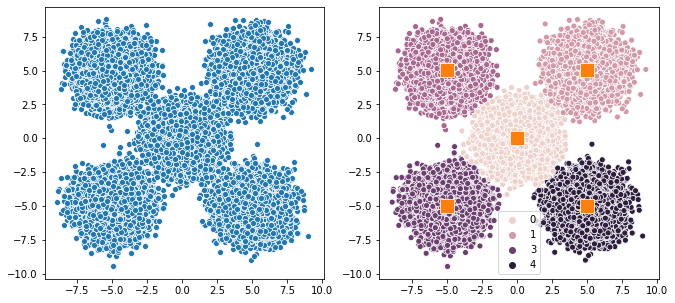

In [85]:

# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()

### There are 5 clusters as stated above